# Lab5 - HomeWork

Imagine we have a stock of several thousands of wine bottles. Each wine has a corresponding price and a review score (0-10). Since there are too many bottles to analyse by hand, let's try to create groups of wines that allow us to better understand and describe our inventory. This could also help us to create some marketing strategies in the future.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add more libraries here if you need
#

1. Import the file `lab5_hw_wines` as a pandas DataFrame

In [4]:
df = pd.read_csv('lab5_hw_wines.csv')
df.head()

,ID_Wine,Price,Review
0,316,5.00,5.4
1,290,4.99,6.1
2,217,5.50,7.1
3,255,19.99,9.0
4,740,3.50,7.4


2. Set the wine ID as the new index

In [5]:
df.set_index('ID_Wine', inplace = True)

3. How many rows does our dataset have?

In [6]:
len(df) #df.shape[0]

1000

4. What are the types of the features?

In [7]:
df.dtypes

Price     float64
Review    float64
dtype: object

5. Is there any significant correlation between `Price` and `Review`? Consider a treshold of 80%

In [8]:
df.corr()

,Price,Review
Price,1.000000,0.656502
Review,0.656502,1.000000


6. Write the code to answer these questions:
    * What is the average, median, and standard-deviation of the wine price?
    * What is the average, median, and standard-deviation of the wine score?

In [9]:
print('Price mean:\t{:.2f}'.format(df['Price'].mean()))
print('Price median:\t{:.2f}'.format(df['Price'].median()))
print('Price std:\t{:.2f}'.format(df['Price'].std()))
print('---------------------')
print('Review mean:\t{:.2f}'.format(df['Review'].mean()))
print('Review median:\t{:.2f}'.format(df['Review'].median()))
print('Review std:\t{:.2f}'.format(df['Review'].std()))

Price mean:	10.82
Price median:	12.00
Price std:	6.23
---------------------
Review mean:	5.88
Review median:	6.90
Review std:	2.98


7. Make any plot (or plots) you like to visualize these features distribution

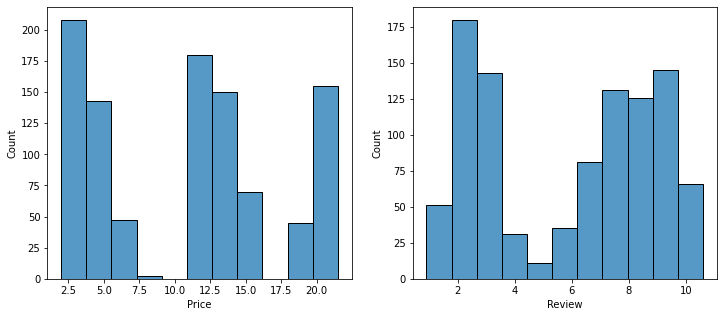

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.histplot(df, x = "Price" , ax = ax[0])
sns.histplot(df, x = "Review" , ax = ax[1])
plt.show()

# Let's cluster some wine!

8. Before we can move to clustering the wines, it is important that both features are in the same unit scale. Normalize the dataset.

In [11]:
# Scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns, index = df.index)

9. Using the K-Means algorithm, can you figure out what is the optimal number of clusters? After finding the optimal K, Group the data points and display the cluster centroids.

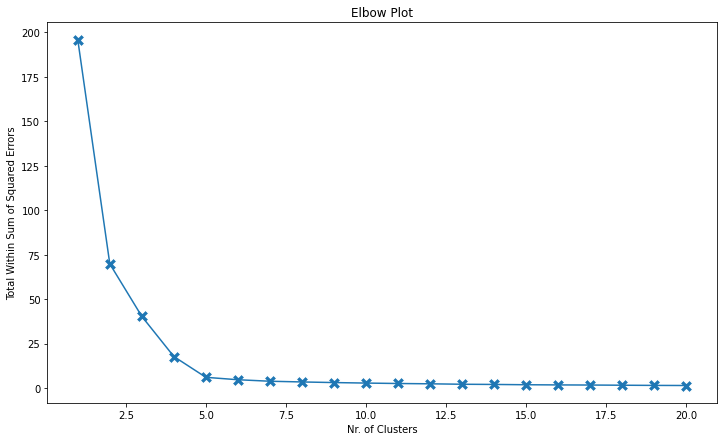

In [12]:
def plot_elbow(df, max_clusters):
    from sklearn.cluster import KMeans
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans_model = KMeans(n_clusters = k, random_state = 0)
        kmeans_model.fit(df)
        sse.append(kmeans_model.inertia_)
    df_sse = pd.DataFrame({'nr_clusters': range(1, max_clusters + 1), 'sse': sse})
    plt.figure(figsize = (12, 7))
    sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')
    sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
    plt.title('Elbow Plot')
    plt.ylabel('Total Within Sum of Squared Errors', fontsize = 10)
    plt.xlabel('Nr. of Clusters', fontsize = 10)
    plt.show()
    
# How to use:
plot_elbow(df = df_scaled, max_clusters = 20)

In [13]:
from sklearn.cluster import KMeans

k = 5
model = KMeans(n_clusters = k, random_state = 0)
model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
df_clustered = df.copy()
df_clustered['cluster'] = model.labels_

In [15]:
centroids = df_clustered.groupby('cluster').mean()
centroids

,Price,Review
cluster,,
0,3.039950,2.027228
1,14.016000,8.038500
2,12.093900,3.009500
3,4.940505,6.897980
4,20.009150,9.497500


10. Profile the obtained results, How can you describe each group? Can you assign a name to each cluster? 

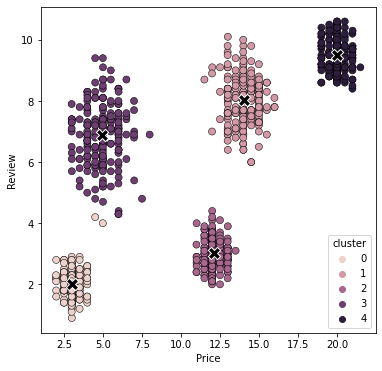

In [16]:
plt.figure(figsize = (6, 6))
sns.scatterplot(data = df_clustered, x = 'Price', y = 'Review', hue = 'cluster', s = 50, linewidth = .5, edgecolor = 'black')
sns.scatterplot(data = centroids, x = 'Price', y = 'Review', s = 150, linewidth = 1, edgecolor = 'white', marker = 'X', legend = False, color = 'black') 
plt.show()

In [17]:
d_clusters = {0: 'cheap_bad', 
              1: 'affordable_good',
              2: 'affordable_bad',
              3: 'cheap_good',
              4: 'expensive_good'}
df_clustered['cluster'] = df_clustered['cluster'].replace(d_clusters)

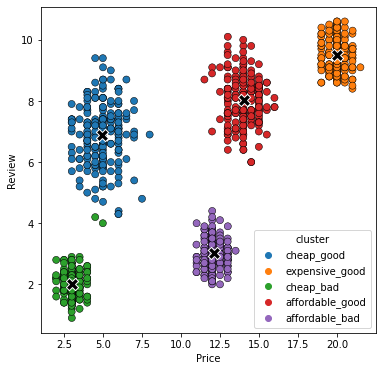

In [18]:
plt.figure(figsize = (6, 6))
sns.scatterplot(data = df_clustered, x = 'Price', y = 'Review', hue = 'cluster', s = 50, linewidth = .5, edgecolor = 'black')
sns.scatterplot(data = centroids, x = 'Price', y = 'Review', s = 150, linewidth = 1, edgecolor = 'white', marker = 'X', legend = False, color = 'black') 
plt.show()

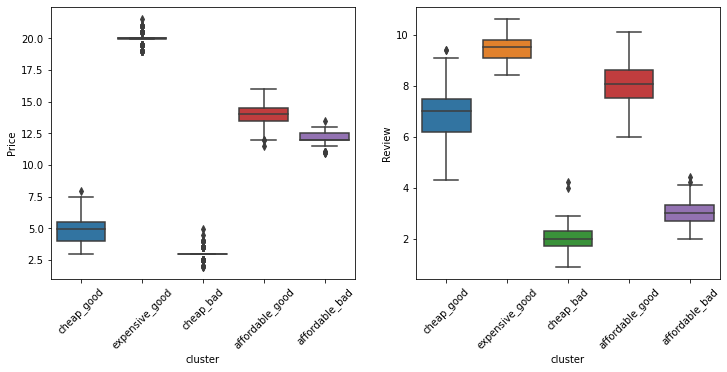

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.boxplot(data = df_clustered, x = 'cluster', y = 'Price', ax = ax[0])
sns.boxplot(data = df_clustered, x = 'cluster', y = 'Review', ax = ax[1])
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
plt.show()